In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
data = pd.read_csv('owid-covid-data.csv')
data.head() 

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [0]:
data.shape

(22026, 33)

In [0]:
data.iso_code.dropna(inplace=True)

In [0]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [0]:
data.shape

(22026, 33)

In [0]:
df = data.groupby(['iso_code'],as_index=False).last()

In [0]:
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,ABW,North America,Aruba,2020-06-05,101,0,3,0,945.994,0.000,28.099,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,106766.0,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-06-05,18054,787,300,6,463.775,20.217,7.706,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50
2,AGO,Africa,Angola,2020-06-05,86,0,4,0,2.617,0.000,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.78,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
3,AIA,North America,Anguilla,2020-06-05,3,0,0,0,199.973,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Europe,Albania,2020-06-05,1197,13,33,0,415.943,4.517,11.467,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.59,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,VNM,Asia,Vietnam,2020-06-05,328,0,0,0,3.370,0.000,0.000,0.000,261004.0,778.0,2.681,0.008,10906.0,0.112,units unclear,65.74,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60
207,YEM,Asia,Yemen,2020-06-05,453,50,103,15,15.188,1.676,3.453,0.503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.33,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70
208,ZAF,Africa,South Africa,2020-06-05,40792,3267,848,56,687.791,55.085,14.298,0.944,785979.0,24445.0,13.252,0.412,21569.0,0.364,units unclear,84.26,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32
209,ZMB,Africa,Zambia,2020-06-05,1111,22,7,0,60.433,1.197,0.381,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,18383956.0,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00


In [0]:
df = df[df.total_cases > 1000]

In [0]:
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
1,AFG,Asia,Afghanistan,2020-06-05,18054,787,300,6,463.775,20.217,7.706,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50
4,ALB,Europe,Albania,2020-06-05,1197,13,33,0,415.943,4.517,11.467,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.59,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89
6,ARE,Asia,United Arab Emirates,2020-06-05,37018,659,273,3,3742.821,66.630,27.603,0.303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,9890400.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.840,17.26,1.2,37.4,NaN,1.20
7,ARG,South America,Argentina,2020-06-05,19255,0,588,5,426.035,0.000,13.010,0.111,172947.0,4014.0,3.827,0.089,4676.0,0.103,tests performed,90.74,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00
8,ARM,Asia,Armenia,2020-06-05,11221,697,176,6,3786.741,235.216,59.395,2.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,USA,North America,United States,2020-06-05,1872660,21140,108211,1036,5657.538,63.867,326.919,3.130,18908412.0,1296287.0,57.125,3.916,532075.0,1.607,tests performed,72.69,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
200,UZB,Asia,Uzbekistan,2020-06-05,3965,91,16,0,118.467,2.719,0.478,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.11,33469199.0,76.134,28.2,4.469,2.873,6253.104,NaN,724.417,7.57,1.3,24.7,NaN,4.00
203,VEN,South America,Venezuela,2020-06-05,2087,135,20,0,73.393,4.748,0.703,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.19,28435943.0,36.253,29.0,6.614,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80
208,ZAF,Africa,South Africa,2020-06-05,40792,3267,848,56,687.791,55.085,14.298,0.944,785979.0,24445.0,13.252,0.412,21569.0,0.364,units unclear,84.26,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32


In [0]:
df.drop(index=149,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
1,AFG,Asia,Afghanistan,2020-06-05,18054,787,300,6,463.775,20.217,7.706,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50
4,ALB,Europe,Albania,2020-06-05,1197,13,33,0,415.943,4.517,11.467,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.59,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89
6,ARE,Asia,United Arab Emirates,2020-06-05,37018,659,273,3,3742.821,66.630,27.603,0.303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.22,9890400.0,112.442,34.0,1.144,0.526,67293.483,NaN,317.840,17.26,1.2,37.4,NaN,1.20
7,ARG,South America,Argentina,2020-06-05,19255,0,588,5,426.035,0.000,13.010,0.111,172947.0,4014.0,3.827,0.089,4676.0,0.103,tests performed,90.74,45195777.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00
8,ARM,Asia,Armenia,2020-06-05,11221,697,176,6,3786.741,235.216,59.395,2.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,USA,North America,United States,2020-06-05,1872660,21140,108211,1036,5657.538,63.867,326.919,3.130,18908412.0,1296287.0,57.125,3.916,532075.0,1.607,tests performed,72.69,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
200,UZB,Asia,Uzbekistan,2020-06-05,3965,91,16,0,118.467,2.719,0.478,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.11,33469199.0,76.134,28.2,4.469,2.873,6253.104,NaN,724.417,7.57,1.3,24.7,NaN,4.00
203,VEN,South America,Venezuela,2020-06-05,2087,135,20,0,73.393,4.748,0.703,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.19,28435943.0,36.253,29.0,6.614,3.915,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80
208,ZAF,Africa,South Africa,2020-06-05,40792,3267,848,56,687.791,55.085,14.298,0.944,785979.0,24445.0,13.252,0.412,21569.0,0.364,units unclear,84.26,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32


In [0]:
df.fillna(value=df.mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
df['fatality_rate'] = df['total_deaths']/df['total_cases']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
china_india = df[df.iso_code.isin(['IND','ITA'])]

In [0]:
china_india

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,fatality_rate
91,IND,Asia,India,2020-06-05,226770,9851,6348,273,164.326,7.138,4.600,0.198,3966075.0,128868.0,2.874,0.093,119994.0,0.087,samples tested,79.17,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550000,0.53,0.027993
97,ITA,Europe,Italy,2020-06-05,234013,177,33689,88,3870.425,2.927,557.195,1.455,3999591.0,37299.0,66.151,0.617,56049.0,0.927,tests performed,60.19,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,57.731442,3.18,0.143962


Text(0.5, 1.0, 'No of cases')

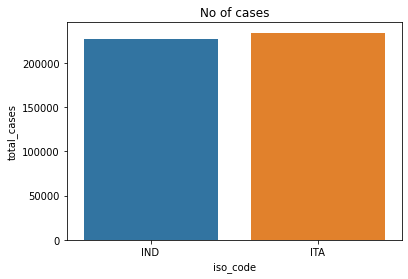

In [0]:
sns.barplot(china_india.iso_code,china_india.total_cases)
plt.title('No of cases')

Text(0.5, 1.0, 'No of Deaths')

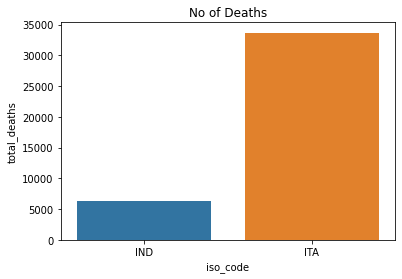

In [0]:
sns.barplot(china_india.iso_code,china_india.total_deaths)
plt.title('No of Deaths')

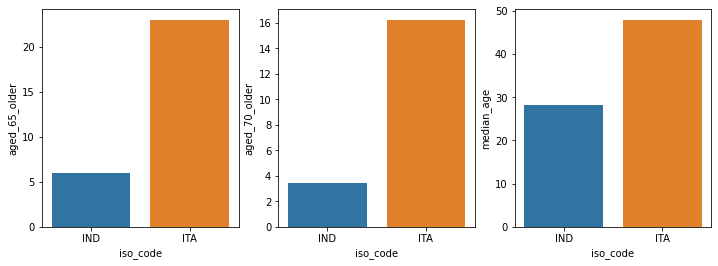

In [0]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.barplot(china_india.iso_code,china_india.aged_65_older,ax=ax[0])
sns.barplot(china_india.iso_code,china_india.aged_70_older,ax=ax[1])
sns.barplot(china_india.iso_code,china_india.median_age,ax=ax[2])

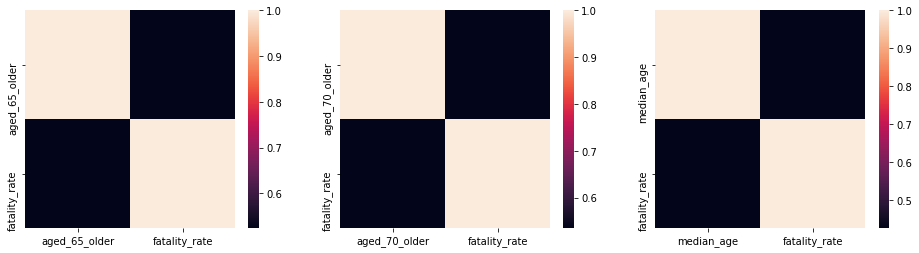

In [0]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
sns.heatmap(df[['aged_65_older','fatality_rate']].corr(),ax=ax[0])
sns.heatmap(df[['aged_70_older','fatality_rate']].corr(),ax=ax[1])
sns.heatmap(df[['median_age','fatality_rate']].corr(),ax=ax[2])

In [0]:
# Correlation Testing
from scipy.stats import pearsonr
stat, p = pearsonr(df.aged_70_older, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.535, p=0.000
Probably dependent


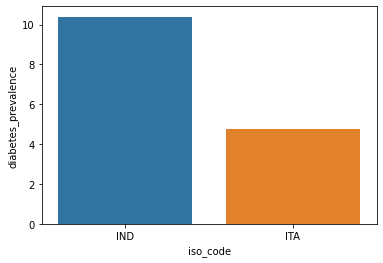

In [0]:
# Comorbid conditions are said to be important
sns.barplot(china_india.iso_code,china_india.diabetes_prevalence)
# So this should go against india

In [0]:
df[['diabetes_prevalence','fatality_rate']].corr()

,diabetes_prevalence,fatality_rate
diabetes_prevalence,1.000000,-0.192141
fatality_rate,-0.192141,1.000000


In [0]:
stat, p = pearsonr(df.diabetes_prevalence, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.192, p=0.037
Probably dependent


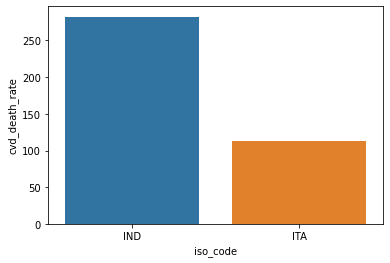

In [0]:
# Comorbid conditions are said to be important
# sns.scatterplot(df.cvd_death_rate,df.total_deaths)
sns.barplot(china_india.iso_code,china_india.cvd_death_rate)
# So this should go against india

In [0]:
df[['cvd_death_rate','fatality_rate']].corr()

,cvd_death_rate,fatality_rate
cvd_death_rate,1.000000,-0.297087
fatality_rate,-0.297087,1.000000


In [0]:
# Correlation Testing

stat, p = pearsonr(df.cvd_death_rate, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.297, p=0.001
Probably dependent


In [0]:
# sns.scatterplot(df.total_cases_per_million,df.fatality_rate)
df[['total_cases_per_million','fatality_rate']].corr()

,total_cases_per_million,fatality_rate
total_cases_per_million,1.000000,0.045591
fatality_rate,0.045591,1.000000


In [0]:
#Correlation Testing

stat, p = pearsonr(df.total_cases_per_million, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.046, p=0.624
Probably independent


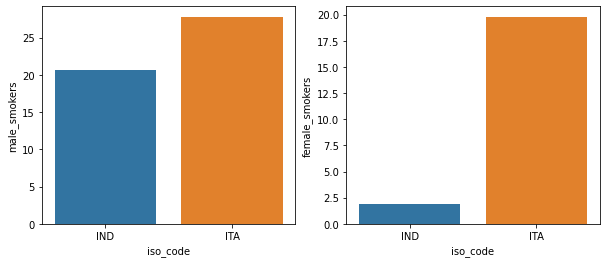

In [0]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.barplot(china_india.iso_code,china_india.male_smokers,ax=ax[0])
sns.barplot(china_india.iso_code,china_india.female_smokers,ax=ax[1])

In [0]:
df[['female_smokers','fatality_rate']].corr()

,female_smokers,fatality_rate
female_smokers,1.000000,0.414457
fatality_rate,0.414457,1.000000


In [0]:
# Correlation Testing

stat, p = pearsonr(df.female_smokers, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.414, p=0.000
Probably dependent


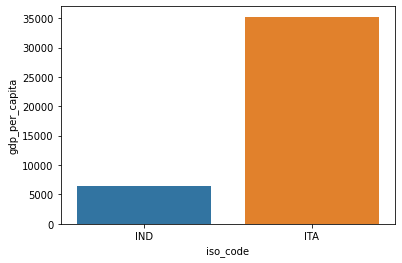

In [0]:
sns.barplot(china_india.iso_code,china_india.gdp_per_capita)

,gdp_per_capita,fatality_rate
gdp_per_capita,1.000000,0.176031
fatality_rate,0.176031,1.000000


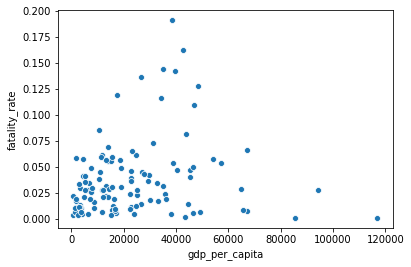

In [0]:
sns.scatterplot(df.gdp_per_capita,df.fatality_rate)
df[['gdp_per_capita','fatality_rate']].corr()

In [0]:
# Correlation Testing
stat, p = pearsonr(df.gdp_per_capita, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.176, p=0.057
Probably independent
